<a href="https://colab.research.google.com/github/Rogerio-mack/Visualizacao-de-Dados-em-Python/blob/main/EE_python_workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<img src="https://github.com/Rogerio-mack/work/raw/main/Evento_Semana_EE_2022.png" width=100, align="left">


# **Minicurso - Visualização de dados com Python**
rogerio.oliveira@mackenzie.br

# Book Course

Pré Print Visualização de Dados em Python - Code, Atualizações e Add-ons

Para adquirir o livro físico ou digital acesse https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python e contribua para podermos manter a criação de materiais como este. Acesse [aqui](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/intro.html) o conteúdo no formato de livro do Jupyter Book, ou [aqui](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/blob/main/capa.ipynb) para o índice dos capítulos no GitHub.




<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="380" align="left"/>
</p>

# Basic imports

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns


# **Evolução dos Dados**
<hr>

## **How to:** Extraindo valores diários de ações e índices

In [42]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from yahoofinancials import YahooFinancials

# data

# stock_name = 'USDBRL=X'
# stock_name = 'PETR4.SA'
stock_name = 'BTC-USD'

yahoo_financials = YahooFinancials(stock_name)
data=yahoo_financials.get_historical_price_data("2020-01-01", "2022-08-31", "monthly")
stock_df = pd.DataFrame(data[stock_name]['prices'])
stock_df = stock_df.drop('date', axis=1).set_index('formatted_date')
display( stock_df.head() )

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-01-01,9553.125977,6914.996094,7194.892090,9350.529297,852872174496,9350.529297
2020-02-01,10457.626953,8492.932617,9346.357422,8599.508789,1163376492768,8599.508789
2020-03-01,9167.695312,4106.980957,8599.758789,6438.644531,1290442059648,6438.644531
2020-04-01,9440.650391,6202.373535,6437.319336,8658.553711,1156127164831,8658.553711
2020-05-01,9996.743164,8374.323242,8672.782227,9461.058594,1286368141507,9461.058594


## **How to:** Selecionando dados de um DataFrame

### Columns

In [44]:
display( stock_df[['high','low']].head() )

,high,low
formatted_date,,
2020-01-01,9553.125977,6914.996094
2020-02-01,10457.626953,8492.932617
2020-03-01,9167.695312,4106.980957
2020-04-01,9440.650391,6202.373535
2020-05-01,9996.743164,8374.323242


### Rows

In [45]:
display( stock_df[ stock_df['high'] > 10000 ].head() )

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-02-01,10457.626953,8492.932617,9346.357422,8599.508789,1163376492768,8599.508789
2020-06-01,10199.565430,8975.525391,9463.605469,9137.993164,650913318680,9137.993164
2020-07-01,11415.864258,8977.015625,9145.985352,11323.466797,545813339109,11323.466797
2020-08-01,12359.056641,11012.415039,11322.570312,11680.820312,708377092130,11680.820312
2020-09-01,12067.081055,9916.493164,11679.316406,10784.491211,1075949438431,10784.491211


### Rows + Columns

In [46]:
display( stock_df[ stock_df['high'] > 10000 ][['high','low']].head() )

,high,low
formatted_date,,
2020-02-01,10457.626953,8492.932617
2020-06-01,10199.565430,8975.525391
2020-07-01,11415.864258,8977.015625
2020-08-01,12359.056641,11012.415039
2020-09-01,12067.081055,9916.493164


## **How to:** Plot line

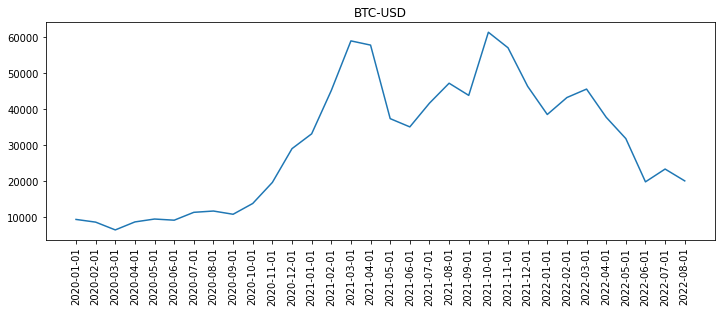

In [47]:
# plot data

plt.figure(figsize=(12,4))
plt.plot(stock_df.index, stock_df.close)
plt.xticks(rotation=90)
plt.title(stock_name)
plt.show()

## **How to:** Múltiplos gráficos (*script layer*)

,x,sin_x,tanh_x
0,-10.000000,0.544021,-1.0
1,-9.797980,0.364599,-1.0
2,-9.595960,0.170347,-1.0
3,-9.393939,-0.030834,-1.0
4,-9.191919,-0.230760,-1.0


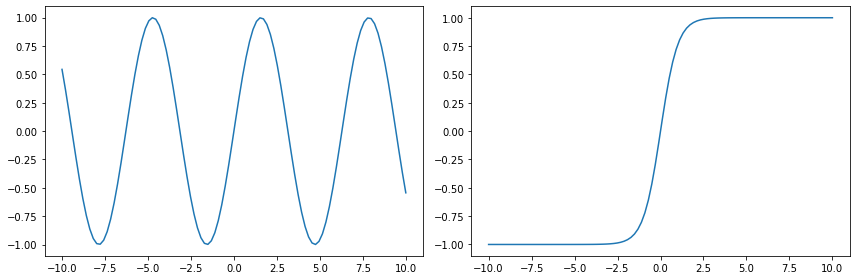

In [48]:
# data

df = pd.DataFrame()
df['x'] = np.linspace(-10,10,100)
df['sin_x'] = np.sin(df.x)
df['tanh_x'] = np.tanh(df.x)
display(df.head())

# plot data

plt.figure(figsize=(12,4))

# plt.subplot(rows,columns,number)
plt.subplot(1,2,1)
plt.plot(df.x, df.sin_x)

plt.subplot(1,2,2)
plt.plot(df.x, df.tanh_x)

plt.tight_layout()
plt.show()

# **Faça você agora...**

Escolha de 4 a 6 séries de dados da bolsa. Você escolher ações ou indicadores diferentes, ou diferentes indicadores de um mesmo ativo. Plot cada dado em um subplot diferente, todos em um mesmo gráfico, empregando a forma *script layer* do `Matplotib`. 

In [49]:
# Your code

# **Distribuição dos Dados**
<hr>

## **How to:** Acessando dados de arquivos `.csv`, `.excel` etc.

Veja aqui para acesso a [External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)

In [50]:
# https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda
# 4 ultimas semanas gasolina etanol

# data

df = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/qus/ultimas-4-semanas-diesel-gnv-2.csv',sep=';')
display( df.head() )
print( df.shape )

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,PR,PATO BRANCO,SANTOS & MERLO LTDA.,79.854.667/0001-01,RUA TOCANTINS,2535,NaN,CENTRO,85501-010,DIESEL S10,04/07/2022,"7,55",NaN,R$ / litro,RODOIL
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL S10,07/07/2022,"8,98",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL,07/07/2022,"8,95",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,DIESEL S10,07/07/2022,"8,98",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,DIESEL,07/07/2022,"8,95",NaN,R$ / litro,VIBRA ENERGIA


(29693, 16)


## **How to**: *Xi...*, as vezes os dados não estão como esperamos 😠

Em muitos é necessário fazermos *transformações dos dados* para a visualização das informações que queremos. Seleção dos dados, agregações, *reshape* (transformações de linhas em colunas etc.), limpeza dos dados, mudanças de formato etc. Abaixo, um único ajuste é apresentado como exemplo, corrigindo o formato do campo `Valor de Venda`. Essas são tarefas que podemos entender como *prévias* à visualização e, embora importantes, não são tratadas em detalhe aqui.

In [51]:
df.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [52]:
try:
  print( df['Valor de Venda'].mean() )
except:
  print('Erro ao calcular a média... provavelmente dados não numéricos')
  print( df['Valor de Venda'].dtype )


Erro ao calcular a média... provavelmente dados não numéricos
object


In [53]:
df['Valor de Venda']

0        7,55
1        8,98
2        8,95
3        8,98
4        8,95
         ... 
29688    7,38
29689    7,28
29690    7,04
29691    7,19
29692    7,09
Name: Valor de Venda, Length: 29693, dtype: object

In [54]:
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.')
df['Valor de Venda'] = df['Valor de Venda'].astype('float')

try:
  print( df['Valor de Venda'].mean() )
except:
  print('Erro ao calcular a média... provavelmente dados não numéricos')
  print( df['Valor de Venda'].dtype )

7.438552655508032


## **How to**: Exibindo a Distribuição de Valores



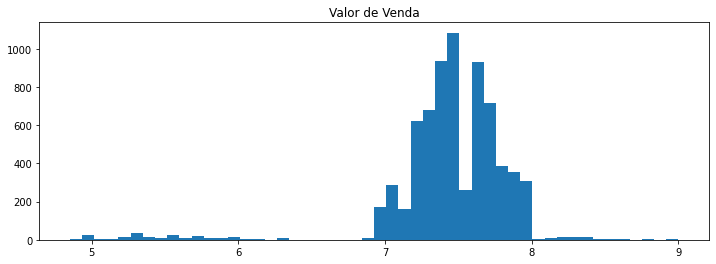

In [57]:
# plot

plt.figure(figsize=(12,4))

plt.hist(df[ df['Estado - Sigla'] == 'SP' ]['Valor de Venda'],bins=50)
plt.title('Valor de Venda')
plt.show()

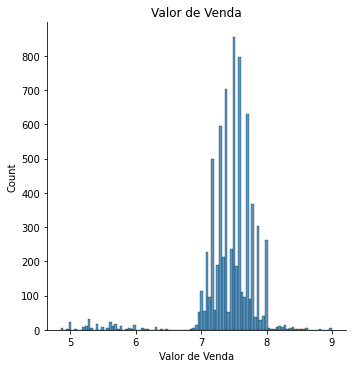

In [56]:
sns.displot(df[ df['Estado - Sigla'] == 'SP' ]['Valor de Venda'])
plt.title('Valor de Venda')
plt.show()

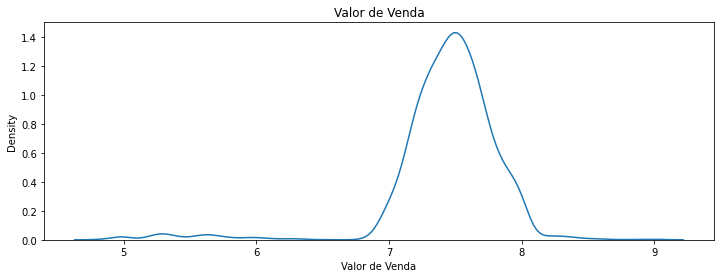

In [62]:
plt.figure(figsize=(12,4))

sns.kdeplot(df[ df['Estado - Sigla'] == 'SP' ]['Valor de Venda'])
plt.title('Valor de Venda')
plt.show()

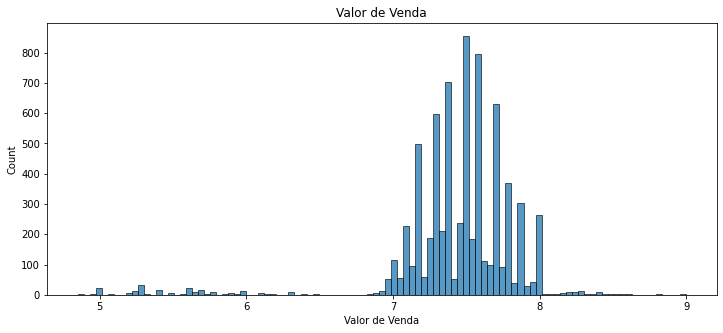

In [61]:
# um exemplo mais elaborado 
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(df[ df['Estado - Sigla'] == 'SP' ]['Valor de Venda'], ax=ax)
ax.set_title('Valor de Venda')

plt.show()



# **Faça você agora...**

Escolha 2 a 4 estados diferentes para comparar a distribuição dos preços dos combustíveis. Tente empregar agora o plot dos diferentes estados em um mesmo gráfico e adicione rótulos. Se empregar o histograma, experimente os parâmetros `density` e `bins` (veja a documentação na documentação do Matplotlib sobre esses parâmetros... onde? Google ;-)).

In [ ]:
# Your code

# **Relações**
<hr>

## **How to**: Gráfico de Dispersão



In [64]:
url = "http://www.orlandoalbarracin.com.br/phyton/Gdp_per_capita.xlsx"
df = pd.read_excel(url)
display( df.head() )

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices
0,Afghanistan,2.661718,7.460144,0.490880,52.339527,0.427011
1,Albania,4.639548,9.373718,0.637698,69.051659,0.749611
2,Algeria,5.248912,9.540244,0.806754,65.699188,0.436670
3,Argentina,6.039330,9.843519,0.906699,67.538704,0.831966
4,Armenia,4.287736,9.034711,0.697925,65.125687,0.613697
